# **Text Analysis Project**
## By: Min Chang



## Importing & Loading the Dataset

The dataset is a CSV file that I renamed to 'text_data.csv'.

Although I have used Jupyter Notebooks plenty of times, I switched to using Google Colab instead which is a great and convenient alternative of Jupyter Notebooks with an easier interface in my opinion. Like I have used Google Colab for the Projects 1 and 2, I will be using it again for Project 3.

Here, I will be reading the dataset by importing it from my local desktop.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving text_data.csv to text_data.csv


### Extracting keyword data from the above file and converting it to a weighted adjacency matrix

Since Google Colab doesn't have networkx matplotlib installed as default, I must first install that.

In [1]:
!pip install networkx matplotlib --quiet


Again, I will be using these Python Libraries for the following purposes:

* **numpy:** to create and manipulate the adjacency matrix for the co-occurrence network, handling numerical operations and matrix calculations.
* **pandas:** to load, process, and analyze structured data from the CSV file.
* **networkx:** to create, analyze, and visualize the weighted co-occurrence network, allowing tasks like computing node degree, strength, and graph-based rankings.
* **matplotlib.pyplot:** to create visualizations, including scatter plots and network diagrams, to better understand and present the relationships in the data.

Also to note, the text_data.csv obtained for this Project is a structured dataset of keywords which is already processed for co-occurrence.

BI-grams and PMI are not necessary unless the dataset was raw text data. But this text_data.csv dataset is not considered a raw text data. It’s a preprocessed dataset of keywords extracted from documents or articles. After looking at it, this dataset is structured into columns (Title, Keyword 1, Keyword 2, etc.).

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

filename = list(uploaded.keys())[0]
text_data = pd.read_csv(filename)

keywords_columns = [col for col in text_data.columns if "Keyword" in col]
keywords_data = text_data[keywords_columns].fillna("")

keywords_list = keywords_data.apply(lambda row: [kw for kw in row if kw], axis=1).tolist()

unique_keywords = set(keyword for keywords in keywords_list for keyword in keywords)
unique_keywords = sorted(unique_keywords)

After loading the dataset and extracting the keyword data, I converted the keyword data into an adjacency matrix and then filled the adjacency matrix based on co-occurence of keywords in the same article to capture the co-occurrence relationships between all pairs of keywords.

Once the adjacency matrix was filled, the next step was to convert the matrix to a pandas DataFrame so that its easier to read.

In [ ]:
keyword_index = {keyword: idx for idx, keyword in enumerate(unique_keywords)}
adjacency_matrix = np.zeros((len(unique_keywords), len(unique_keywords)))

for keywords in keywords_list:
    for i, keyword1 in enumerate(keywords):
        for keyword2 in keywords[i+1:]:
            idx1, idx2 = keyword_index[keyword1], keyword_index[keyword2]
            adjacency_matrix[idx1, idx2] += 1
            adjacency_matrix[idx2, idx1] += 1

adjacency_df = pd.DataFrame(adjacency_matrix, index=unique_keywords, columns=unique_keywords)

adjacency_df.head()


,AGENCY theory,AGGRESSION (Psychology),AMBIVALENCE,ANGER in the workplace,BEHAVIORAL research,BOARDS of directors,BREAK-even analysis,BURNOUT (Psychology),BUSINESS communication,BUSINESS enterprises,...,VIOLENCE in the workplace,WAGE payment systems,WAGES,WOMEN -- Employment,WOMEN employees,WORK & family,WORK attitudes,WORK environment,WORK environment -- Psychological aspects,WORKFLOW
AGENCY theory,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGGRESSION (Psychology),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
AMBIVALENCE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANGER in the workplace,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
BEHAVIORAL research,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Reading the adjacency matrix and convert it into a weighted network

This step for task 3 constructs and visualizes a weighted co-occurrence network from the adjacency matrix:

Graph Construction:

* A graph (G) is created using the networkx library.
* Nodes: Each keyword becomes a node in the graph.
* Edges: Edges are added between nodes based on the co-occurrence relationships captured in the adjacency matrix, with weights representing the frequency of co-occurrence.

Visualization:

* Uses the spring layout to arrange the nodes in the graph, optimizing spacing and reducing overlap for clarity.


Purpose:

This step helps to understand and analyze the relationships between keywords.
The network visualization highlights strongly connected keywords (frequently co-occurring) and their relative importance in the dataset.


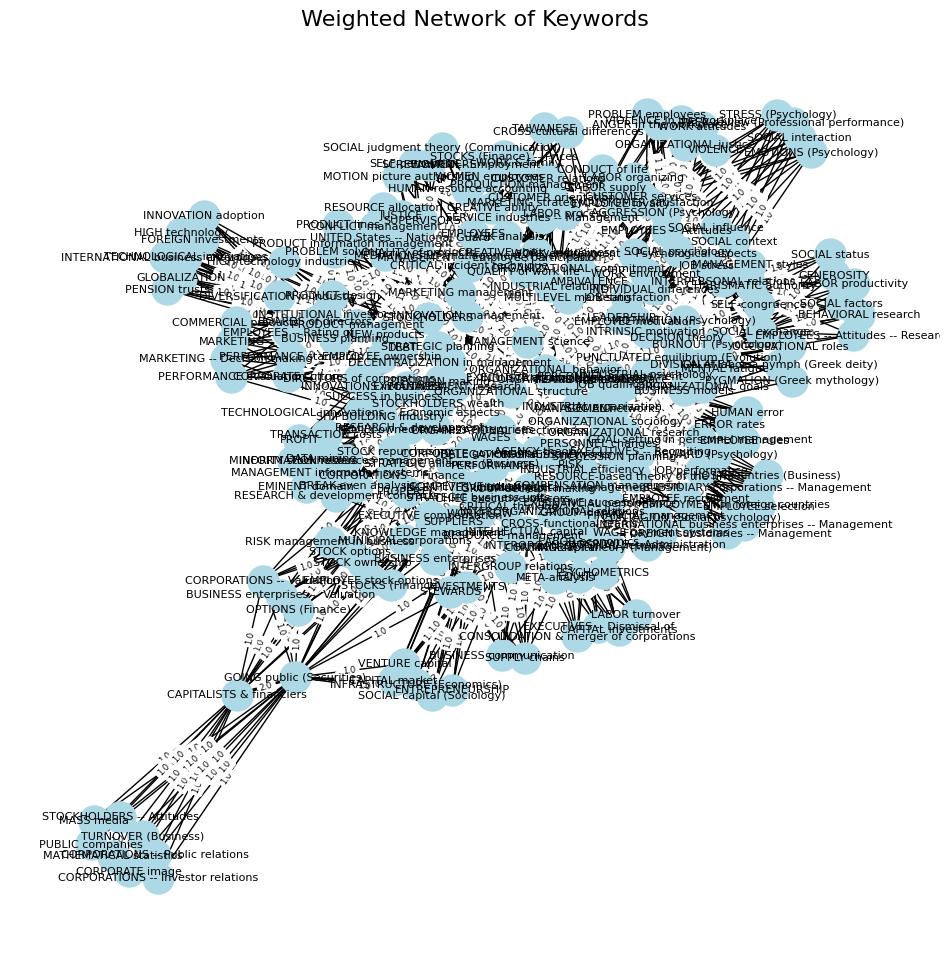

In [ ]:
G = nx.Graph()

for keyword in unique_keywords:
    G.add_node(keyword)

# Edges with weights but with non-zero weights since filtering for > 0
# would only let valid and significant relationships be represented in the graph.
for i, keyword1 in enumerate(unique_keywords):
    for j, keyword2 in enumerate(unique_keywords):
        if adjacency_matrix[i, j] > 0:
            G.add_edge(keyword1, keyword2, weight=adjacency_matrix[i, j])

pos = nx.spring_layout(G, seed=42)  # Set layout for better visualization
plt.figure(figsize=(12, 12))

# nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=[d["weight"] for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# edge labels with weights
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Weighted Network of Keywords", fontsize=16)
plt.axis("off")
plt.show()


### Computing the node degree and strength.

* In this step, I used Keyword Extraction to identify and process all keywords from the dataset to make sure that any existing duplicates and NULL values were taken care of.

* I then created an Adjacency Matrix to represent the co-occurrence relationships between keywords using a matrix format. Each cell should have the frequency of co-occurrence between two keywords.

* Next I converted the adjacency matrix into a graph where the nodes are shown as keywords and the edges as co-occurrences. All weighted by the frequency.

Here is the metric computation I used to compute the node metrics as per Task 4:

* degree (number of connections for each keyword)
* strength (total weight of edges for each keyword) to measure:

In [ ]:
keywords_columns = [col for col in text_data.columns if "Keyword" in col]
keywords_list = text_data[keywords_columns].fillna("").values.tolist()
unique_keywords = sorted({kw for row in keywords_list for kw in row if kw})

adjacency_matrix = np.zeros((len(unique_keywords), len(unique_keywords)))
keyword_index = {keyword: idx for idx, keyword in enumerate(unique_keywords)}

for keywords in keywords_list:
    indices = [keyword_index[kw] for kw in keywords if kw]
    for i, idx1 in enumerate(indices):
        for idx2 in indices[i + 1:]:
            adjacency_matrix[idx1, idx2] += 1
            adjacency_matrix[idx2, idx1] += 1

G = nx.from_numpy_array(adjacency_matrix)
mapping = {i: keyword for i, keyword in enumerate(unique_keywords)}
G = nx.relabel_nodes(G, mapping)

# Computing the node metrics for degree and strength
node_degree = dict(G.degree())
node_strength = dict(G.degree(weight='weight'))
node_metrics = pd.DataFrame({
    'Node': list(node_degree.keys()),
    'Degree': list(node_degree.values()),
    'Strength': list(node_strength.values())
}).sort_values(by='Strength', ascending=False)

node_metrics.head()


,Node,Degree,Strength
154,ORGANIZATIONAL behavior,166,265.0
157,ORGANIZATIONAL effectiveness,104,144.0
135,MANAGEMENT science,102,136.0
169,PERSONNEL management,93,126.0
47,DECISION making,90,112.0


### The top 10 nodes by degree and top 10 nodes by strength

This code identifies and displays the top 10 most connected keywords in the network based on degree and strength.

The top 10 nodes by degree shows the number of connections (edges) a node (keyword) has in the network and keywords with high degree values connected to many other keywords.

The top 10 nodes by strength shows the total weight of edges connected to a node. The calculation I used was the SUM of co-occurrence frequencies.


In [16]:
# Top 10 nodes by degree
top_10_by_degree = node_metrics.nlargest(10, 'Degree')[['Node', 'Degree']]

# Top 10 nodes by strength
top_10_by_strength = node_metrics.nlargest(10, 'Strength')[['Node', 'Strength']]

print("Top 10 Nodes by Degree:")
print(top_10_by_degree)

print("\nTop 10 Nodes by Strength:")
print(top_10_by_strength)


Top 10 Nodes by Degree:
                             Node  Degree
154       ORGANIZATIONAL behavior     166
157  ORGANIZATIONAL effectiveness     104
135            MANAGEMENT science     102
169          PERSONNEL management      93
47                DECISION making      90
162      ORGANIZATIONAL structure      74
161      ORGANIZATIONAL sociology      66
220            STRATEGIC planning      66
99          INDUSTRIAL management      64
28           CORPORATE governance      62

Top 10 Nodes by Strength:
                             Node  Strength
154       ORGANIZATIONAL behavior     265.0
157  ORGANIZATIONAL effectiveness     144.0
135            MANAGEMENT science     136.0
169          PERSONNEL management     126.0
47                DECISION making     112.0
162      ORGANIZATIONAL structure     107.0
161      ORGANIZATIONAL sociology      96.0
28           CORPORATE governance      85.0
99          INDUSTRIAL management      84.0
220            STRATEGIC planning      80.0


Based on the output of the top 10 nodes by degree and strength. We can see that ORGANIZATIONAL behavior is the top in both metrics. Therefore, Degree 166 is the most connected keyword, meaning it co-occurs with the highest number of other keywords. It also has the highest total co-occurrence frequency with a strength of 265, meaning that it appears frequently alongside others.

CORPORATE governance which is rank 8 in strength, has strong co-occurrence relationships even though it has fewer connections being rank 10 in Degree.


### Top 10 node pairs by weight

For this task, using edges_with_weights would be good to grab all edges and their weights from the graph G, where weights is the frequency of co-occurrence between two keywords.

Since Task 6 asks for the top node pairs by WEIGHT, I sorted by weight with edge list to find the top 10 keyword pairs with the strongest connections.

This shows the most significant keyword pairs: Node 1 and Node 2 and the strength of their relationship by WEIGHT.



In [17]:
edges_with_weights = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]

edges_df = pd.DataFrame(edges_with_weights, columns=['Node 1', 'Node 2', 'Weight'])

# Sorting by weight and pulling the top 10 node pairs
top_10_edges_by_weight = edges_df.nlargest(10, 'Weight')

print("Top 10 Node Pairs by Weight:")
print(top_10_edges_by_weight)


Top 10 Node Pairs by Weight:
                            Node 1                        Node 2  Weight
1796       ORGANIZATIONAL behavior  ORGANIZATIONAL effectiveness    11.0
1800       ORGANIZATIONAL behavior      ORGANIZATIONAL structure     9.0
1802       ORGANIZATIONAL behavior          PERSONNEL management     8.0
1648            MANAGEMENT science       ORGANIZATIONAL behavior     7.0
437           CORPORATE governance       ORGANIZATIONAL behavior     6.0
704                DECISION making       ORGANIZATIONAL behavior     6.0
1799       ORGANIZATIONAL behavior      ORGANIZATIONAL sociology     6.0
1881  ORGANIZATIONAL effectiveness      ORGANIZATIONAL structure     6.0
1279         INDUSTRIAL management       ORGANIZATIONAL behavior     5.0
1352          INDUSTRIAL relations       ORGANIZATIONAL behavior     5.0


Based on the output, "ORGANIZATIONAL behavior" and "ORGANIZATIONAL effectiveness" have the highest weight of 11.0, meaning they co-occur together more frequently than any other pair in the dataset. Since ORGANIZATION behavior seems to be linked to many other keywords, ORGANIZATION behavior is seen more like a 'base'.

## Plotting average strength on y-axis and degree on x-axis

So in this last task, I needed to create a scatter plot that would show:

* X-axis as DEGREE : shows how many edges or connections each keyword node has in the network.

* Y-axis as Average STRENGTH: Shows the average weight of edges connected to a node, calculting it as Strength / Degree to get the average.

* I also decided to make the node colors yellow so that it stands out.


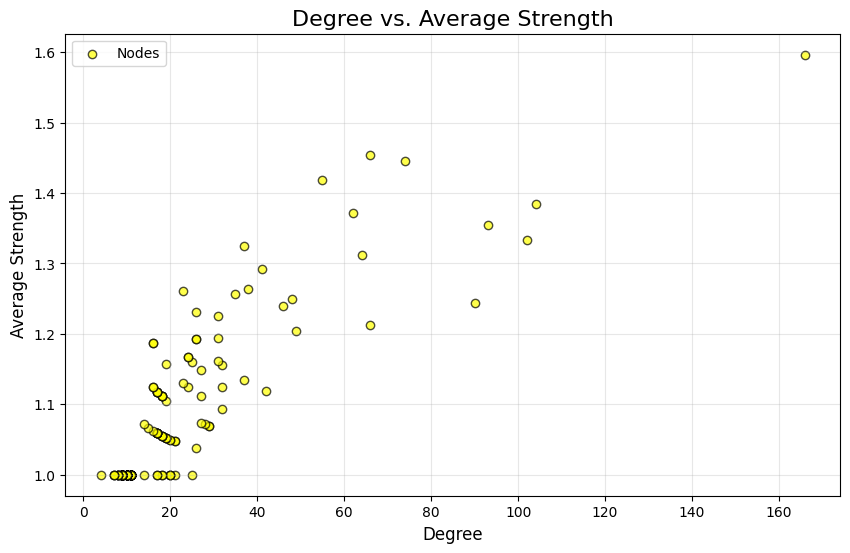

In [ ]:
# Degree vs. Average Strength with yellow dots
plt.figure(figsize=(10, 6))
plt.scatter(
    node_metrics['Degree'],
    node_metrics['Average Strength'],
    alpha=0.7,
    edgecolor='k',
    color='yellow',
    label='Nodes'
)

# Labels, title, and the legend to note the Nodes.
plt.title("Degree vs. Average Strength", fontsize=16)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Average Strength", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()

# Show the plot
plt.show()


* In this output, there are alot of nodes with low degree or fewer connections also have relatively low average strength. We can see that because the clustering is happening near the bottom left side. So the scatter plot is almost showing a linear trend.

* This trend shows that the less-connected nodes seem to have weaker relationships overall.

* The single plot on the top right corner of the graph is most likely the "ORGANIZATION behavior" node since its the most frequently co-occurring keyword in the network.

* Theres only two nodes that are a little above the 100 degree mark meaning that this is where it sort of stops growing.
